In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import tree
import warnings
from sklearn.inspection import permutation_importance
warnings.filterwarnings(action='ignore')

In [5]:
X_train = pd.read_csv("aggregate_train.csv")
#X_train = X_train.drop(labels = ['Unnamed: 0'], axis = 1)
X_train = X_train.dropna(axis = 1)
y_train = pd.read_csv("Y_train_T2.csv")
#y_train = y_train.drop(labels = ['Unnamed: 0'], axis = 1)
y_train = y_train["los_icu"]

X_valid = pd.read_csv("aggregate_valid.csv")
X_valid = X_valid.dropna(axis = 1)
#X_valid = X_valid.drop(labels = ['Unnamed: 0'], axis = 1)
y_valid = pd.read_csv("Y_valid_T2.csv")
#y_valid = y_valid.drop(labels = ['Unnamed: 0'], axis = 1)
y_valid = y_valid["los_icu"]

In [ ]:
#alternatively you can load the X as below:
X_train = pd.read_csv("X_train.csv", index_col=[0], header=[0, 1, 2])
X_train = aggregate_features(X_train, mask=True, time=False, less=False, ran=True, std=True)
X_test = pd.read_csv("X_test.csv", index_col=[0], header=[0, 1, 2])
X_test = aggregate_features(X_test, mask=True, time=False, less=False, ran=True, std=True)
X_valid = pd.read_csv("X_valid.csv", index_col=[0], header=[0, 1, 2])
X_valid = aggregate_features(X_valid, mask=True, time=False, less=False, ran=True, std=True)

In [5]:
#best config of task 2
model = GradientBoostingRegressor(n_estimators=3000,
                                   learning_rate=0.005,
                                   min_samples_leaf=70,
                                   min_samples_split=1100,
                                   max_depth=12,
                                   max_features='sqrt',
                                   random_state=10)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.5149718808490003
RMSE of valid: 1.7683843296236268


In [11]:
model = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,min_samples_leaf=70,min_samples_split=1100,max_depth=12,max_features='sqrt',random_state=10)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.5748937871834043
RMSE of valid: 1.7648835728581245


In [13]:
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=0, scoring = 'neg_root_mean_squared_error')
print(result.importances_mean)

[1.08007363e-02 6.27809070e-03 1.19231122e-03 2.41356780e-03
 4.45717162e-03 1.37419028e-03 2.00503595e-03 1.37994671e-03
 2.57709755e-03 2.39397586e-04 1.26639235e-03 7.80190077e-04
 4.81340194e-03 1.84223979e-04 7.57886341e-04 8.54070955e-04
 4.03299839e-03 6.35257356e-04 8.60522135e-04 1.17449580e-03
 1.35552990e-02 3.88219878e-04 6.75627942e-04 9.23990626e-04
 7.59515441e-03 8.47894398e-04 1.27510429e-03 1.96789047e-03
 5.74009411e-03 2.92206386e-04 8.21515979e-04 1.10367527e-03
 1.58620008e-03 1.24236796e-04 2.33183283e-03 1.20105446e-03
 5.59427120e-03 2.22554095e-04 1.10829250e-03 7.85554037e-04
 4.00387550e-03 1.27633558e-04 1.23742396e-03 8.84242661e-04
 3.73404378e-03 2.44652482e-04 3.50198553e-03 1.44134505e-03
 8.23029479e-03 3.83743341e-04 1.24994828e-03 4.26016440e-03
 7.93759606e-03 1.02760232e-03 9.12853102e-04 8.66575796e-04
 4.19115365e-03 2.58508075e-04 2.53247750e-03 2.15744085e-03
 2.22245722e-03 2.19894293e-04 2.63730366e-03 1.75495717e-03
 1.10054540e-02 7.931233

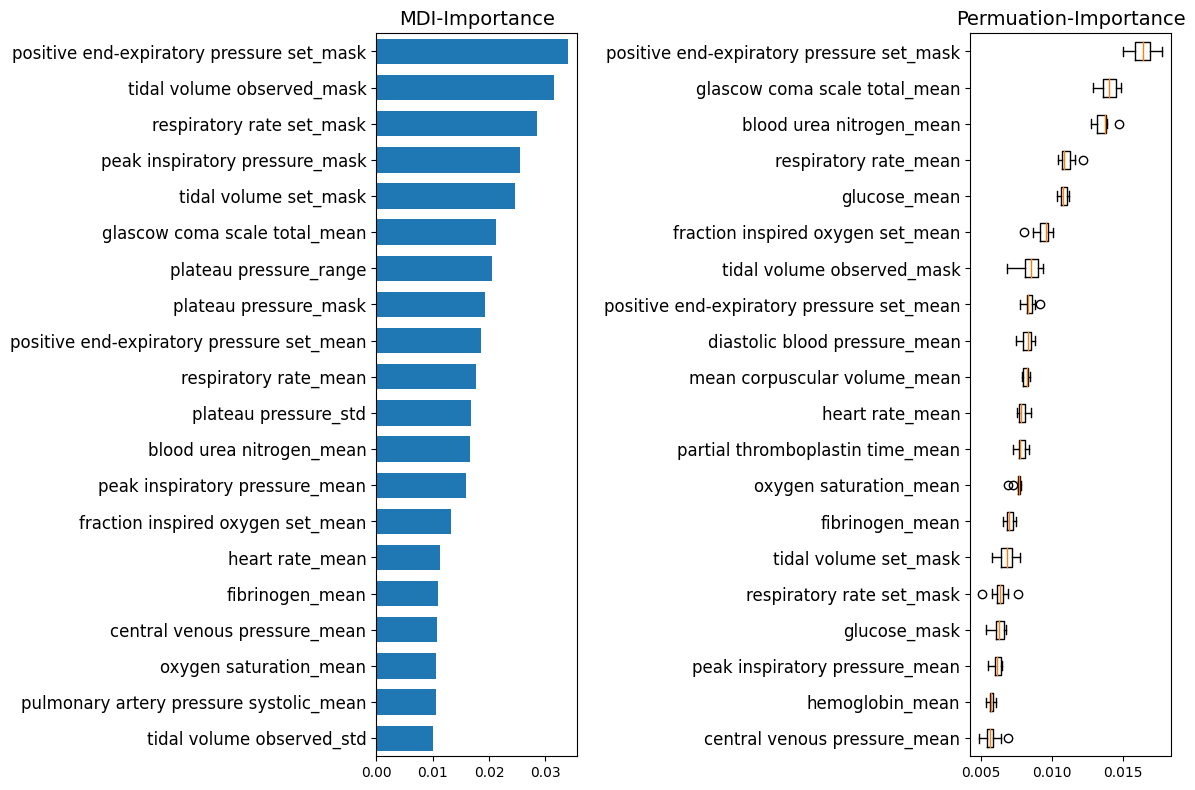

In [17]:
perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

perm_sorted_idx_new = perm_sorted_idx[-20:]
tree_importance_sorted_idx_new = tree_importance_sorted_idx[-20:]
tree_indices_new = np.arange(0, 20) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices_new, model.feature_importances_[tree_importance_sorted_idx_new], height=0.7)
ax1.set_yticks(tree_indices_new)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx_new], fontsize=12)
# ax1.set_ylim((0, len(gbc.feature_importances_)))
ax1.set_ylim((0, 20))
ax1.set_title('MDI-Importance', fontsize=14)

ax2.boxplot(
    result.importances[perm_sorted_idx_new].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx_new],
)
ax2.tick_params(axis='y',labelsize=12)
ax2.set_title('Permuation-Importance', fontsize=14)
fig.tight_layout()
plt.show()

In [3]:
model = GradientBoostingRegressor(n_estimators=3000,
                                   learning_rate=0.005,
                                   min_samples_leaf=70,
                                   min_samples_split=1100,
                                   max_depth=12,
                                   max_features='sqrt',
                                   random_state=10)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.5054025991207434
RMSE of valid: 1.7659822674661272


In [5]:
model = GradientBoostingRegressor(n_estimators=3100,
                                   learning_rate=0.005,
                                   min_samples_leaf=70,
                                   min_samples_split=1100,
                                   max_depth=12,
                                   max_features='sqrt',
                                   random_state=10)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.499211892876994
RMSE of valid: 1.7660887961952427


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
    i = 1

    for train_index, val_index in kf.split(X_train): 
        train_index = list(train_index)
        X_train_kf, y_train_kf = X_train.loc[train_index, :], y_train.loc[train_index, :] 
        X_val_kf, y_val_kf = X_train.loc[val_index, :], y_train.loc[val_index, :]
        for n_estimator in np.linspace(30, 100, 70):
            dtc = DecisionTreeRegressor(max_depth=1, random_state=1)
            ada_moral = AdaBoostRegressor(base_estimator=dtc, 
                                           n_estimators=int(n_estimator),
                                           learning_rate=0.5, 
                                           random_state=1)
            ada_moral.fit(X_train_kf, y_train_kf)
            
            val_pred = ada_moral.predict(X_val_kf)
            
            print(f'Finished training on n_estimator {int(n_estimator)} in fold {i}.\n'
                  f'auc={mean_squared_error(y_val_kf, val_pred, squared=False)}.')


dtc = DecisionTreeRegressor(max_depth=1, random_state=1)
best_tree = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators=70,
                                learning_rate=0.5, 
                                random_state=1)
best_tree.fit(X_train, y_train.iloc[:, 0].values.ravel())

In [26]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators=90,
                                learning_rate=0.001, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.6535378522574748
RMSE of valid: 1.8728759088735218


In [29]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators = 100,
                                learning_rate=0.001, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.6542765600558533
RMSE of valid: 1.8722902118298856


In [30]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators = 110,
                                learning_rate=0.001, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.6540940479629598
RMSE of valid: 1.8707892506821093


In [33]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators = 110,
                                learning_rate=0.002, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.652699598874477
RMSE of valid: 1.8682059269196036


In [34]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators = 110,
                                learning_rate=0.003, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.6491163350820441
RMSE of valid: 1.8639669820258842


In [35]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators = 110,
                                learning_rate=0.004, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.6460860466653482
RMSE of valid: 1.8615765009769596


In [36]:
dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
model = AdaBoostRegressor(base_estimator=dtc, 
                                n_estimators = 110,
                                learning_rate=0.005, 
                                loss = 'exponential', 
                                random_state=1)
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

RMSE of train: 1.639552479852409
RMSE of valid: 1.866193626578253


In [38]:
for i in [0.0041, 0.0042, 0.0043, 0.0044, 0.0045]:
    dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
    model = AdaBoostRegressor(base_estimator=dtc, 
                                    n_estimators = 110,
                                    learning_rate=i, 
                                    loss = 'exponential', 
                                    random_state=1)
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    print(i)
    print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
    print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))

0.0041
RMSE of train: 1.6403875327872277
RMSE of valid: 1.8680129857192846
0.0042
RMSE of train: 1.642231625314691
RMSE of valid: 1.8665672733648921
0.0043
RMSE of train: 1.645158161733117
RMSE of valid: 1.8624008636325142
0.0044
RMSE of train: 1.6403121796538753
RMSE of valid: 1.872060001893476
0.0045
RMSE of train: 1.6389227386310472
RMSE of valid: 1.8671809943204847


In [ ]:
for i in [0.006, 0.007 0.008]:
    dtc = DecisionTreeRegressor(max_depth = 10, random_state=1)
    model = AdaBoostRegressor(base_estimator=dtc, 
                                    n_estimators = 110,
                                    learning_rate=i, 
                                    loss = 'exponential', 
                                    random_state=1)
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    print(i)
    print('RMSE of train:' , mean_squared_error(y_train, y_pred_train, squared=False))
    print('RMSE of valid:' , mean_squared_error(y_valid, y_pred_valid, squared=False))